In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from astropy.table import Table

In [2]:
t = Table.read('/tmp/nnpz_compare/r_shift9/n_real_65ce2ef21faf0cdf5edae8fb253e6b25.fits')

<IPython.core.display.Javascript object>


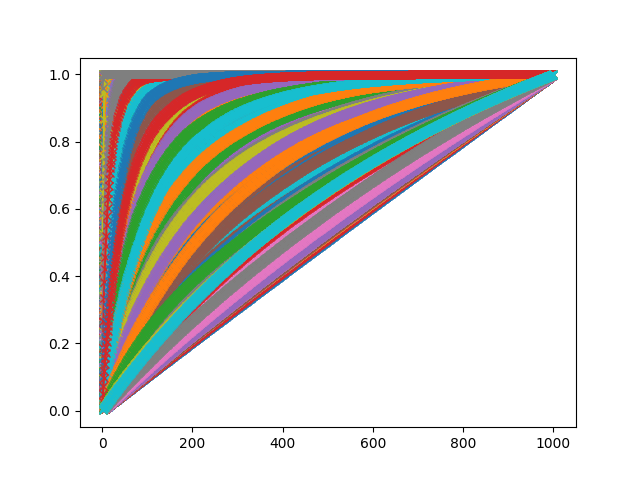

In [3]:
plt.figure(1)
for r in t:
    plt.plot(np.arange(1,1001), np.cumsum(-np.sort(-r['NeighborWeights']) / np.sum(r['NeighborWeights'])), 'x-')

In [4]:
w_sum = np.sum(t['NeighborWeights'], axis=1)
w_norm = np.flip(np.sort(t['NeighborWeights'] / w_sum[:, None]), axis=1)

In [5]:
w_cumsum = np.cumsum(w_norm, axis=1)

<IPython.core.display.Javascript object>


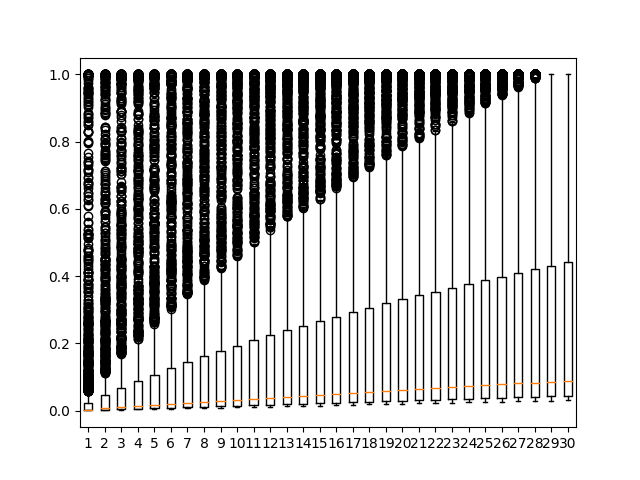

In [6]:
plt.figure()
_ = plt.boxplot(w_cumsum[:,0:30])

In [7]:
reference = Table.read('/tmp/nnpz_compare/photometry_8b6c4039f17794ee5b63d26f92624919.fits')

<IPython.core.display.Javascript object>


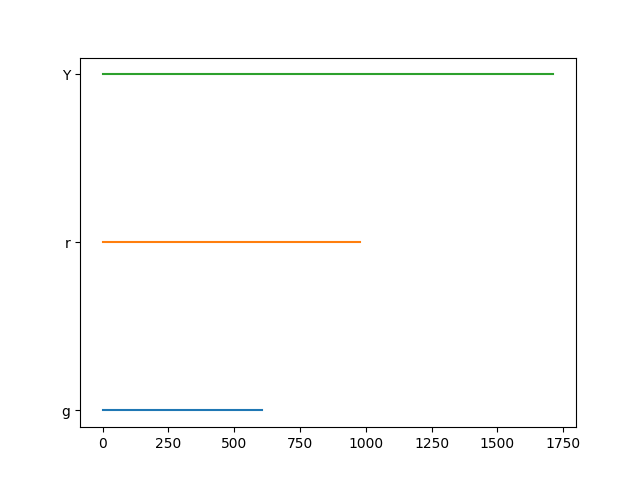

In [8]:
limits = {}
plt.figure()
for f in ['g', 'r', 'Y']:
    limits[f] = reference[f].min(), reference[f].max()
    plt.plot(limits[f], [f,f])

In [12]:
np.where(np.logical_or(t['r_obs'] < limits['r'][0], t['r_obs'] > limits['r'][1]))
np.where(np.logical_or(t['g_obs'] < limits['g'][0], t['g_obs'] > limits['g'][1]))
np.where(np.logical_or(t['Y_obs'] < limits['Y'][0], t['Y_obs'] > limits['Y'][1]))

(array([874]),)